In [1]:
import pandas as pd
import numpy as np

In [2]:
raw_kindergarten = pd.read_excel('/Users/hankiho/Desktop/빅데이터_공모전_원본데이터(유치원)/원본/전국어린이집표준데이터.xls',
              encoding='utf-8')

In [3]:
raw_kindergarten.columns

Index(['어린이집명', '시도명', '시군구명', '어린이집유형구분', '정원수', '보육교직원수', '소재지도로명주소',
       '어린이집전화번호', '어린이집팩스번호', '보육실수', '놀이터수', 'CCTV설치수', '통학차량운영여부', '홈페이지주소',
       '데이터기준일자', '제공기관코드', '제공기관명'],
      dtype='object')

In [5]:
raw_kindergarten.head(1)

,어린이집명,시도명,시군구명,어린이집유형구분,정원수,보육교직원수,소재지도로명주소,어린이집전화번호,어린이집팩스번호,보육실수,놀이터수,CCTV설치수,통학차량운영여부,홈페이지주소,데이터기준일자,제공기관코드,제공기관명
0,남해포교당연꽃어린이집,경상남도,남해군,법인·단체,130,22.0,경상남도 남해군 남해읍 망운로10번길 45-10,055-864-6230,NaN,9.0,1.0,12.0,Y,NaN,2018-07-31,5430000,경상남도 남해군


In [6]:
pd.crosstab(raw_kindergarten['어린이집유형구분'], raw_kindergarten['통학차량운영여부'])

통학차량운영여부,,N,Y,n,y
어린이집유형구분,,,,,
가정,3098,10704,9057,55,192
국공립,477,1854,1239,14,66
민간,2315,2605,12147,31,401
법인·단체,104,97,804,0,25
사회복지법인,206,65,1848,0,64
직장,214,831,193,29,2
협동,20,98,46,3,1


In [7]:
raw_kindergarten.groupby('시도명')['정원수'].mean()

시도명
강원도        46.151020
경기도        39.239891
경상남도       41.184660
경상북도       45.032250
광주광역시      51.320132
대구광역시      51.468531
대전광역시      35.759443
부산광역시      46.956258
서울특별시      43.472046
세종특별자치시    52.104294
울산광역시      45.657984
인천광역시      42.954776
전라남도       55.694470
전라북도       46.586538
제주특별자치도    58.443359
충청남도       45.011195
충청북도       52.502905
Name: 정원수, dtype: float64

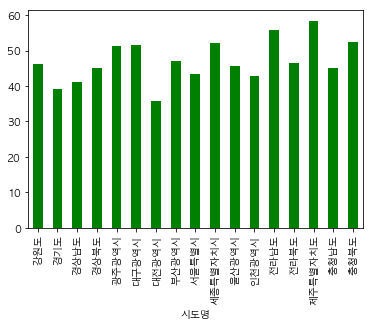

In [13]:
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

raw_kindergarten.groupby('시도명')['정원수'].mean().plot.bar(color='green')
#raw_kindergarten.loc[raw_kindergarten['어린이집유형구분'] == '국공립'].groupby('시도명')['어린이집유형구분'].count().plot.bar(color='green')
#save_img = 'test_02.png'
#save_img = 'test_02.png'
#plt.savefig(save_img)

plt.show()

In [9]:
raw_kindergarten.groupby('시도명').mean()

,정원수,보육교직원수,보육실수,놀이터수,CCTV설치수
시도명,,,,,
강원도,46.151020,7.553309,3.639849,0.423829,4.486224
경기도,39.239891,7.532822,4.675448,0.451332,4.904265
경상남도,41.184660,7.443457,4.559743,0.413208,3.802483
경상북도,45.032250,7.909959,4.862106,0.528670,7.155266
광주광역시,51.320132,8.419142,5.176980,0.403465,6.926155
대구광역시,51.468531,9.098188,5.154681,0.465673,7.133887
대전광역시,35.759443,6.886017,4.307201,0.265125,5.847059
부산광역시,46.956258,8.733900,4.660948,0.354470,6.609968
서울특별시,43.472046,9.085610,4.457900,0.361056,6.777577


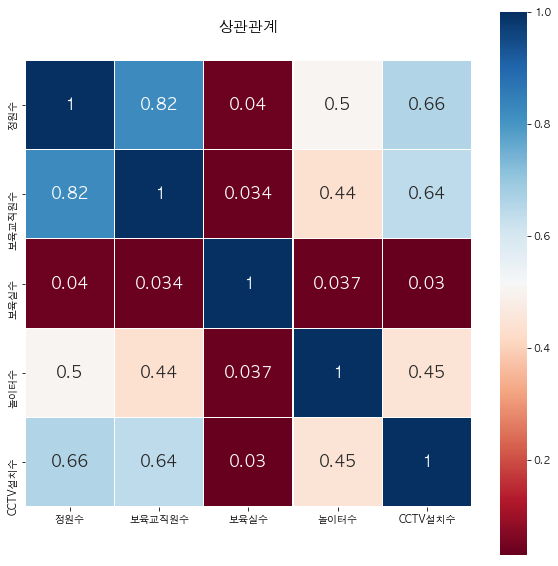

In [17]:
import seaborn as sns

heatmap_data = raw_kindergarten[['정원수','보육교직원수','보육실수','놀이터수','CCTV설치수']] 
colormap = plt.cm.RdBu
plt.figure(figsize=(10, 10))
plt.title('상관관계', y = 1.05, size = 15)

sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 16})

del heatmap_data

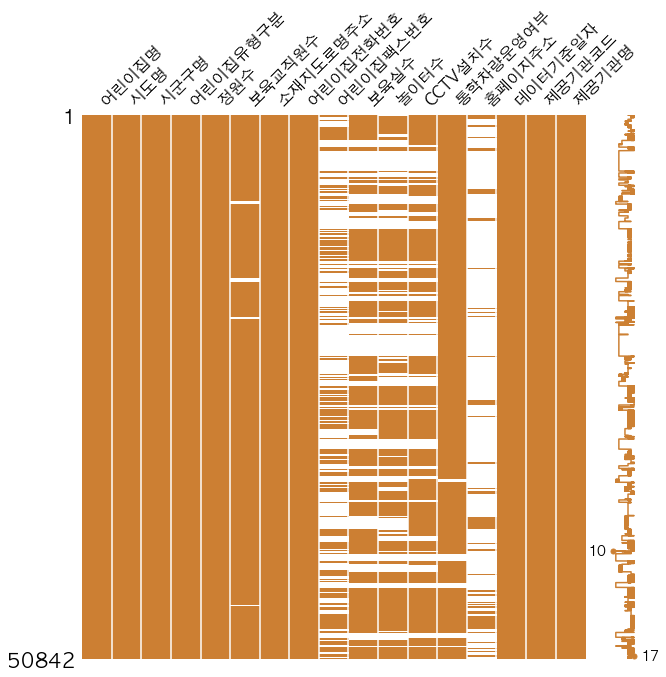

In [14]:
import missingno as msno

msno.matrix(df = raw_kindergarten.iloc[:, :], figsize=(10, 10), color=(0.8, 0.5, 0.2))
save_img = 'test_03.png'
plt.savefig(save_img)

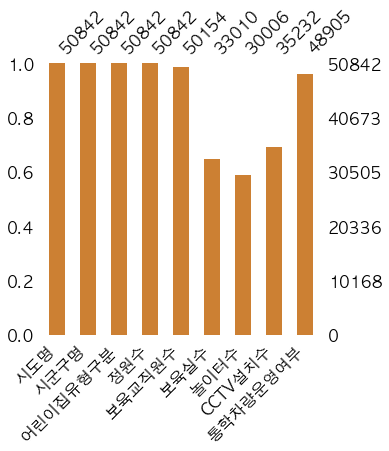

In [15]:
a = raw_kindergarten[['시도명','시군구명','어린이집유형구분','정원수','보육교직원수','보육실수','놀이터수','CCTV설치수',
                 '통학차량운영여부']]
msno.bar(df = a.iloc[:, :], figsize = (5, 5), color = (0.8, 0.5, 0.2))
save_img = '결측치.png'
plt.savefig(save_img)

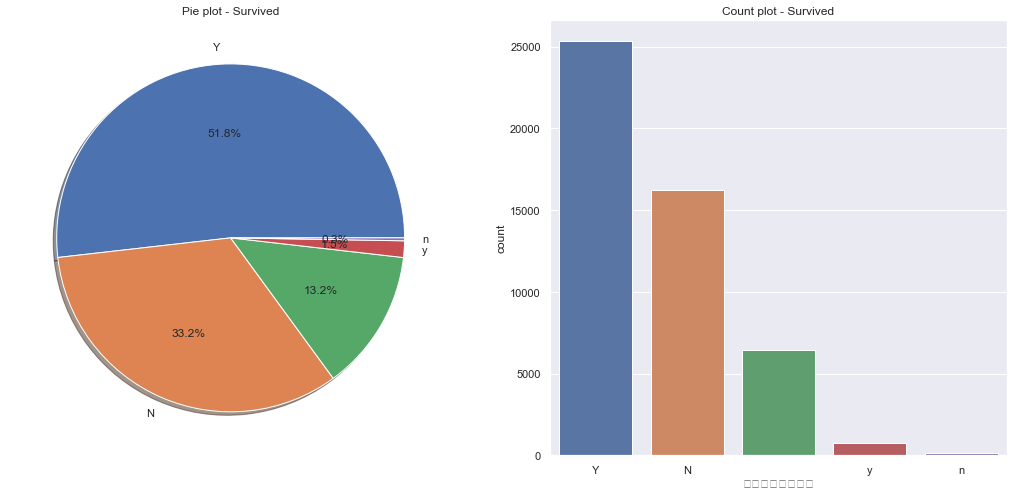

In [43]:
f, ax = plt.subplots(1, 2, figsize=(18, 8)) #하나의 행에 두개의 그래프를 그릴 준비

raw_kindergarten['통학차량운영여부'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0], shadow=True)
#raw_kindergarten['통학차량운영여부'].value_counts().plot.pie(explode=[0, 0.1],autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('통학차량운영여부', data = raw_kindergarten, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

In [34]:
raw_kindergarten[['시도명', '통학차량운영여부']].groupby(['시도명'], as_index=True).count()

,통학차량운영여부
시도명,
강원도,2189
경기도,9239
경상남도,5854
경상북도,3420
광주광역시,2424
대구광역시,2809
대전광역시,1509
부산광역시,1646
서울특별시,5416


In [36]:
pd.crosstab(raw_kindergarten['시도명'],raw_kindergarten['통학차량운영여부'], margins=True)

통학차량운영여부,,N,Y,n,y,All
시도명,,,,,,
강원도,708,226,1178,9,68,2189
경기도,1338,4266,3635,0,0,9239
경상남도,0,1072,4782,0,0,5854
경상북도,2499,67,507,39,308,3420
광주광역시,0,818,1601,1,4,2424
대구광역시,100,919,1790,0,0,2809
대전광역시,220,617,672,0,0,1509
부산광역시,0,469,1067,19,91,1646
서울특별시,632,3628,1156,0,0,5416


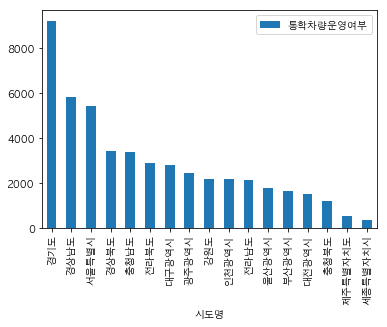

In [38]:
raw_kindergarten[['시도명', '통학차량운영여부']].groupby(['시도명'], as_index=True).count().sort_values(by='통학차량운영여부', ascending=False).plot.bar()

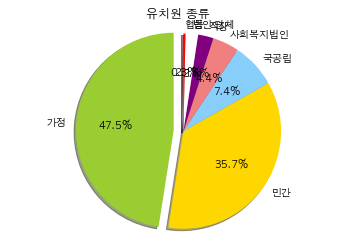

In [137]:
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

labels = ['가정','민간','국공립','사회복지법인','직장','법인·단체','협동']
sizes = [24165, 18136, 3786, 2231, 1299, 1053, 172]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','purple','white','red']
explode = (0.1,0,0,0,0,0,0) #뛰는거 간격
plt.title("유치원 종류")
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.show()